# EARTHQUAKE PREDICTION 
## CALIFORNIA EARTHQUAKE DATA 

In [52]:
import pandas as pd
df = pd.read_csv("Earthquake/Dataset/Earthquake_Data.csv")

display(df)


,Date(YYYY/MM/DD) Time Latitude Longitude Depth Mag Magt Nst Gap Clo RMS SRC EventID
0,1966/07/01 09:41:21.82 35.9463 -120.4700 12....
1,1966/07/02 12:08:34.25 35.7867 -120.3265 8....
2,1966/07/02 12:16:14.95 35.7928 -120.3353 9....
3,1966/07/02 12:25:06.12 35.7970 -120.3282 9....
4,1966/07/05 18:54:54.36 35.9223 -120.4585 7....
...,...
18025,2007/12/19 12:14:09.62 34.1438 -116.9822 7....
18026,2007/12/21 12:14:56.45 37.3078 -121.6735 8....
18027,2007/12/23 21:43:43.54 37.2127 -117.8230 10....
18028,2007/12/28 01:59:42.40 36.5292 -121.1133 5....


### Imported Data Preprocessing 
just renaming the columns and droping of data with date and time 

In [128]:
import pandas as pd
df = pd.read_csv("Earthquake/Dataset/Earthquake_Data.csv", delimiter=r'\s+')
print("Current column names:", df.columns)
print("Number of columns:", len(df.columns))


Current column names: Index(['Date(YYYY/MM/DD)', 'Time', 'Latitude', 'Longitude', 'Depth', 'Mag',
       'Magt', 'Nst', 'Gap', 'Clo', 'RMS', 'SRC', 'EventID'],
      dtype='object')
Number of columns: 13


In [129]:


import pandas as pd
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", 
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]
df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)


,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
1966-07-01 09:41:21.820,35.9463,-120.4700,12.26,3.20,Mx,7,171,20,0.02,NCSN,-4540462
1966-07-02 12:08:34.250,35.7867,-120.3265,8.99,3.70,Mx,8,86,3,0.04,NCSN,-4540520
1966-07-02 12:16:14.950,35.7928,-120.3353,9.88,3.40,Mx,8,89,2,0.03,NCSN,-4540521
1966-07-02 12:25:06.120,35.7970,-120.3282,9.09,3.10,Mx,8,101,3,0.08,NCSN,-4540522
1966-07-05 18:54:54.360,35.9223,-120.4585,7.86,3.10,Mx,9,161,14,0.04,NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-19 12:14:09.620,34.1438,-116.9822,7.03,4.06,ML,10,73,14,0.08,NCSN,40207706
2007-12-21 12:14:56.450,37.3078,-121.6735,8.47,3.08,ML,114,45,5,0.12,NCSN,51192926
2007-12-23 21:43:43.540,37.2127,-117.8230,10.00,3.54,ML,45,176,40,0.07,NCSN,51193070
2007-12-28 01:59:42.400,36.5292,-121.1133,5.99,3.04,ML,70,45,4,0.06,NCSN,51193343


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No_of_Stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   SRC              18030 non-null  object 
 10  EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


#### Exporting the processed  dataset to the  folder

In [130]:
filename="Earthquake/Dataset/Earthquake_processed_dataset.xlsx"
df.to_excel(filename)
print("successfully exported to excel file")

successfully exported to excel file


### Data Splitting using Scikit learn 

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations', 'Gap', 'Close', 'RMS']]
y = df['Magnitude(ergs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Implementing Linear Regression for Train dataset 

In [132]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Implementing Linear Regression on test dataset
just predicting the depentent value from indepentent values

In [133]:
y_pred = regressor.predict(X_test)

### Model Evaluation [MSE,R2 SCORE]

In [135]:
import warnings
warnings.filterwarnings('ignore')

### Predicting of Magnitute for unknown Dataset 


In [115]:
new_data = [[33.89, -118.40, 16.17, 11, 73, 14, 0.08], [37.77, -122.42, 8.05, 14, 45, 4, 0.06]]
new_pred = model.predict(new_data)
print("New predictions:", new_pred)

New predictions: [3.39930557 3.2446148 ]


In [136]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.05, MSE: 0.17


### Visualizing the Linear Regression with scatter Plot and fit line

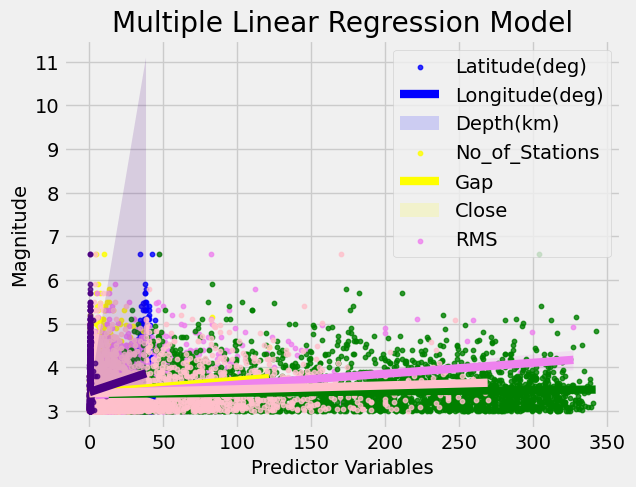

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10})
sns.regplot(x=X_test['Gap'], y=y_test, color='green', scatter_kws={'s': 10})
sns.regplot(x=X_test['Close'], y=y_test, color='pink', scatter_kws={'s': 10})
sns.regplot(x=X_test['RMS'], y=y_test, color='indigo', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations','Gap','Close','RMS'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

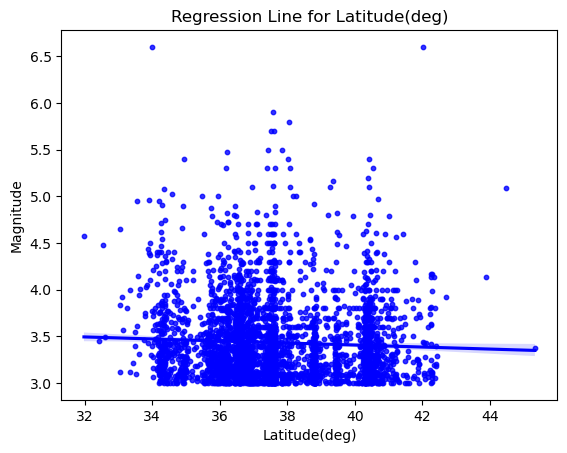

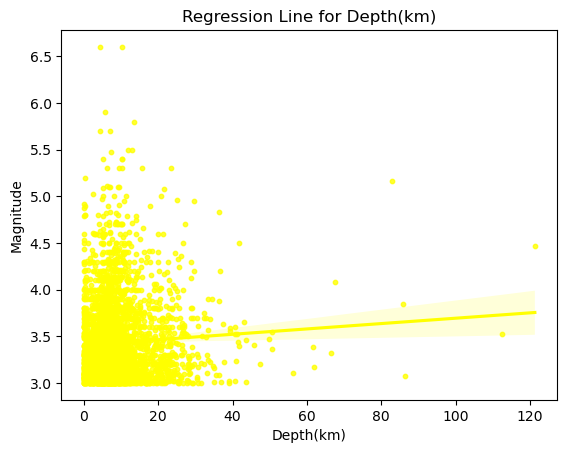

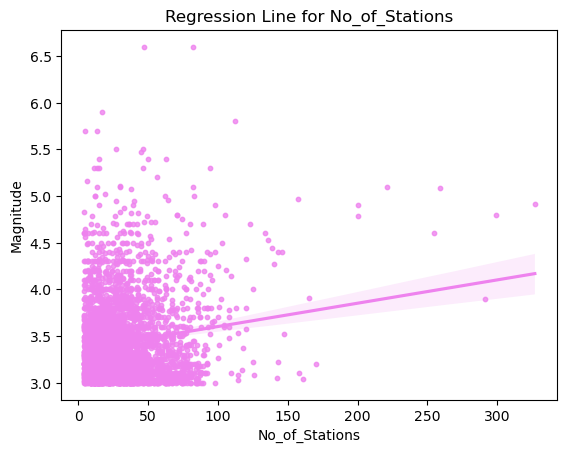

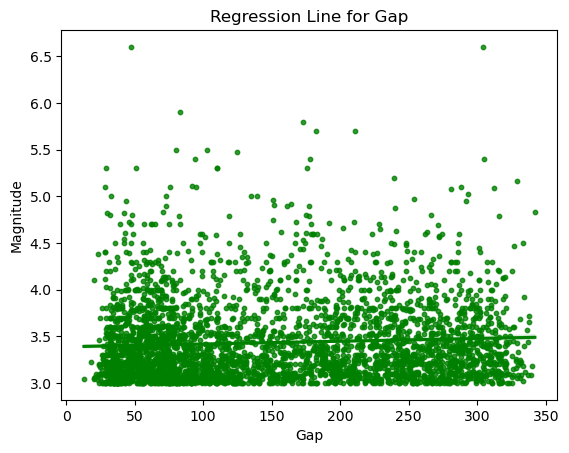

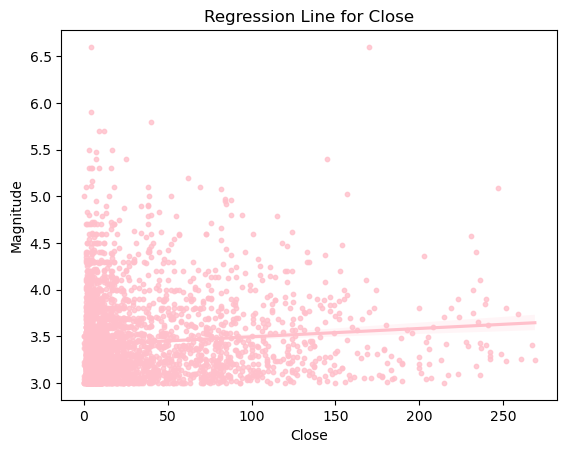

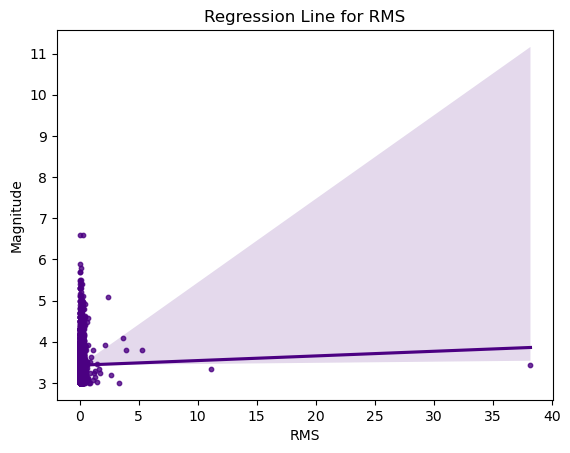

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
predictor_vars = ['Latitude(deg)', 'Depth(km)', 'No_of_Stations', 'Gap', 'Close', 'RMS']
colors = ['blue', 'yellow', 'violet', 'green', 'pink', 'indigo']
for var, color in zip(predictor_vars, colors):
    plt.figure()  
    sns.regplot(x=X_test[var], y=y_test, color=color, scatter_kws={'s': 10})
    plt.xlabel(var)
    plt.ylabel('Magnitude')
    plt.title(f'Regression Line for {var}')
    plt.show()


# Support Vector Machine Implementation

In [138]:
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)


Test score: -0.01055139665498861


#### Scaling the Data for Transformation

In [139]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -0.01, MSE: 0.18


### Visualizing the Prediciton 

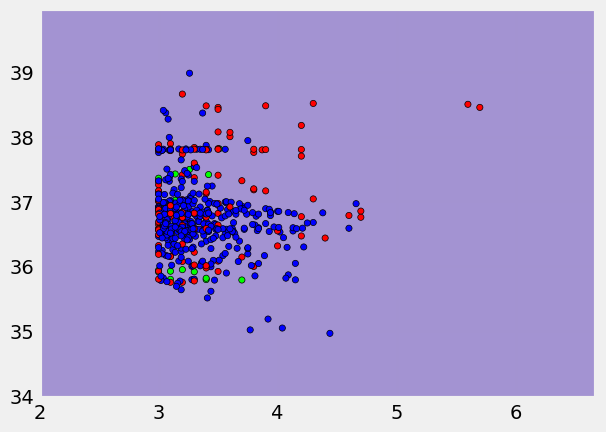

In [140]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from matplotlib.colors import ListedColormap

# Load data and preprocess as needed
# ...

# Create mesh grids
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot decision boundaries
def plot_decision_boundary(ax, clf, xx, yy, cmap='viridis', alpha=0.8):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

# Color maps for different classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Subset size and features
subset_size = 500
features = df[['Magnitude(ergs)', 'Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values

# Map string classes to numerical values
class_mapping = {'ML': 0, 'Mx': 1, 'Md': 2}
numeric_classes = np.array([class_mapping[c] for c in classes])

# Fit SVMs
svm1 = SVC(kernel='rbf')
svm2 = SVC(kernel='rbf')
svm3 = SVC(kernel='rbf')
svm1.fit(features, (classes == 'ML').astype(int))
svm2.fit(features, (classes == 'Mx').astype(int))
svm3.fit(features, (classes == 'Md').astype(int))

# Create mesh grids
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot decision boundaries
fig, ax = plt.subplots()
plot_decision_boundary(ax, svm1, xx, yy, cmap=cmap_light)
plot_decision_boundary(ax, svm2, xx, yy, cmap=cmap_bold)
plot_decision_boundary(ax, svm3, xx, yy, cmap='coolwarm')  # Example of a different colormap
ax.scatter(X0, X1, c=numeric_classes, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()


# Naive Bayes Classifier

In [142]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file with space delimiter
df = pd.read_csv("Earthquake/Dataset/Earthquake_Data.csv", delimiter=r'\s+')

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude", 
                    "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

# Convert magnitude column to categorical data
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=[0, 5, 6, 7, np.inf], labels=['Minor', 'Moderate', 'Strong', 'Major'])

# Encode Magnitude Category
le = LabelEncoder()
df['Magnitude_Category_Encoded'] = le.fit_transform(df['Magnitude_Category'])

# Normalize latitude and longitude values
scaler = MinMaxScaler()
df[['Latitude(deg)', 'Longitude(deg)']] = scaler.fit_transform(df[['Latitude(deg)', 'Longitude(deg)']])

# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'No_of_Stations']]
y = df['Magnitude_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [143]:
y_pred = gnb.predict(X_test)

In [144]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.9853947125161767
Confusion Matrix:
 [[5327   35    1]
 [  38    3    1]
 [   4    0    0]]


## Visualization of NB

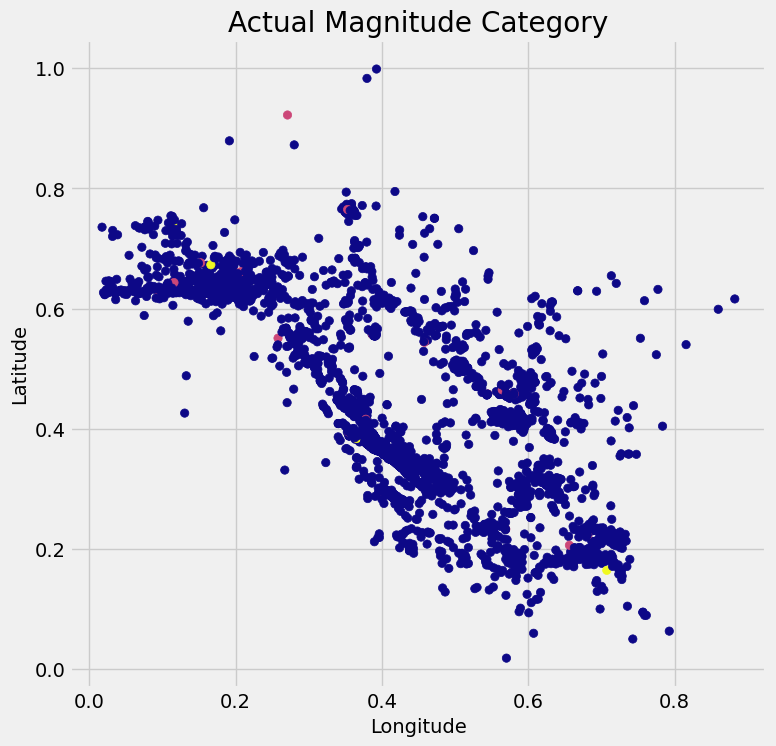

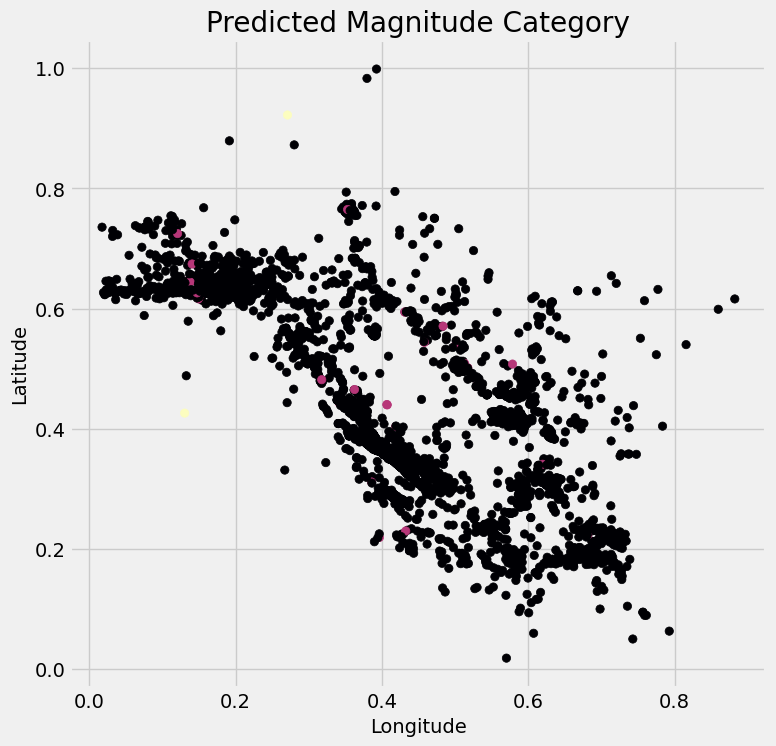

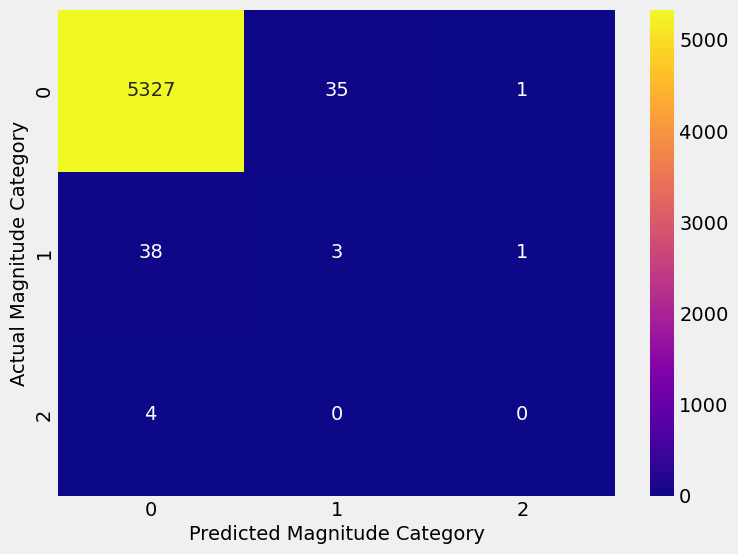

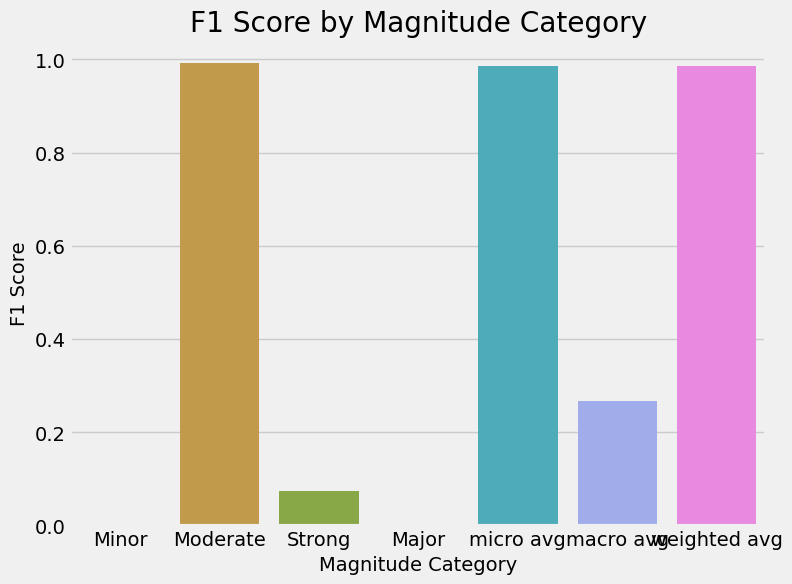

In [145]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.svm import SVC 
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_test, cmap='plasma')
plt.title('Actual Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_pred, cmap='magma')
plt.title('Predicted Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")


# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g')
plt.xlabel('Predicted Magnitude Category')
plt.ylabel('Actual Magnitude Category')
plt.show()
print(" ")

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'], output_dict=True)
# Convert classification report dictionary to DataFrame
cr_df = pd.DataFrame(cr).transpose()


plt.figure(figsize=(8, 6))
sns.barplot(x=cr_df.index, y=cr_df['f1-score'])
plt.xlabel('Magnitude Category')
plt.ylabel('F1 Score')
plt.title('F1 Score by Magnitude Category')
plt.show()
print(" ")
     

# Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)
     

RandomForestRegressor(random_state=42)

In [147]:
y_pred = rf.predict(X_test)

In [148]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)


Mean Squared Error:  0.01258607875762618
R^2 Score:  -0.18318898696107633


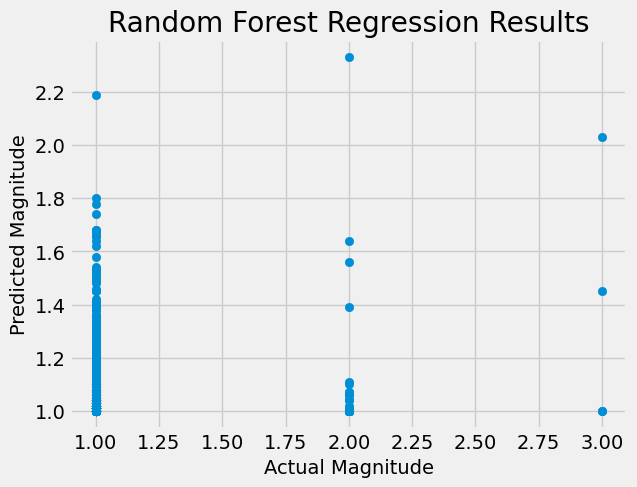

In [149]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

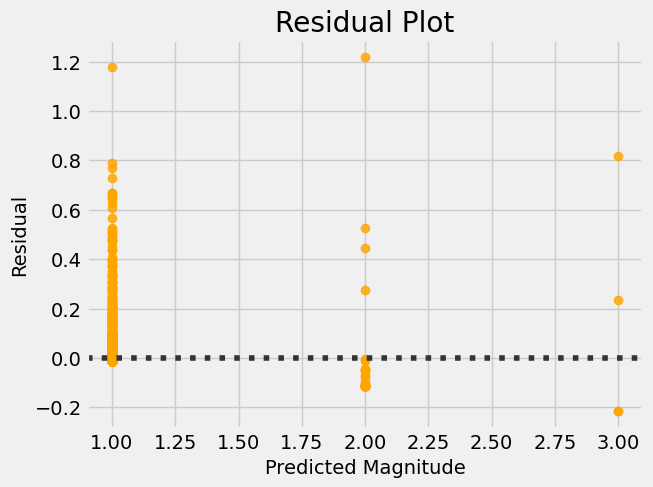

In [150]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# Score Table

In [151]:
scores_df = pd.DataFrame(scores)
display(scores_df)
     

,Model name,mse,R^2
0,Linear regression,0.172532,0.051993
1,SVM,0.183915,-0.010551
2,Random Forest,0.012586,-0.183189


## Best Fit Model among 

In [152]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
0,Linear regression,0.172532,0.051993
